In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [3]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [4]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.model_selection import train_test_split

data_x = pd.DataFrame(X, columns=columns)
data_y = pd.DataFrame(y, columns=["MEDV"])
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [5]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)


modelLR = sm.OLS(y_train, X_train_scaled).fit()
y_predict = modelLR.predict(X_test_scaled)
rmse = sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
print("LinearRegression")
print("\t R-squared: %.4f" % r2_score(y_test.to_numpy().T[0], y_predict))
print("\t RMSE: %.4f" % rmse)


modelR = sm.OLS(y_train, X_train_scaled).fit_regularized(alpha=0.01, L1_wt=0)
y_predict = modelR.predict(X_test_scaled)
rmse = sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
print("Ridge")
print("\t R-squared: %.4f" % r2_score(y_test.to_numpy().T[0], y_predict))
print("\t RMSE: %.4f" % rmse)


modelL = sm.OLS(y_train, X_train_scaled).fit_regularized(alpha=0.01, L1_wt=1)
y_predict = modelL.predict(X_test_scaled)
rmse = sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
print("Lasso")
print("\t R-squared: %.4f" % r2_score(y_test.to_numpy().T[0], y_predict))
print("\t RMSE: %.4f" % rmse)


LinearRegression
	 R-squared: 0.5892
	 RMSE: 5.7835
Ridge
	 R-squared: 0.5830
	 RMSE: 5.8270
Lasso
	 R-squared: 0.5874
	 RMSE: 5.7962


#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [6]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
models_coef = np.array([np.append(['CONST'], columns.real), modelLR.params, modelR.params, modelL.params]).T
pd.DataFrame(models_coef, columns=['Name', 'modelLR','modelR', 'modelL'])

,Name,modelLR,modelR,modelL
0,CONST,22.61188118811884,22.388001176355296,22.601881188118846
1,CRIM,-0.9708201904618883,-0.9389153009963976,-0.9403207092124533
2,ZN,1.0571487264362927,0.996465796871675,1.021496893532641
3,INDUS,0.038310993617577616,-0.05759679238716342,0.0
4,CHAS,0.5945064227496597,0.6097815143041623,0.5947896189341957
5,NOX,-1.855147597588724,-1.722210876777083,-1.8029173266514087
6,RM,2.5732194188149404,2.612004115136789,2.5851653679835738
7,AGE,-0.08761546983236879,-0.11553457817202428,-0.06898551271803863
8,DIS,-2.8809425930993298,-2.7539082704198283,-2.8084741806863898
9,RAD,2.112245419187695,1.8348144923563012,1.9567344883436655


### Comments:
As we can see differents between features weight in models is quite small. The only zero weight is in Lasso model x_3.  Also we can see that x7 have near zero weight too. It can mean that thous features are not important and we can drop tham and make our model better but for this decision we shoul look on P-value.

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

In [7]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

buf_X_train_scaled = X_train_scaled.copy()
buf_X_test_scaled = X_test_scaled.copy()

while True:
    # Teach model and get R-squre value
    model = sm.OLS(y_train, buf_X_train_scaled).fit()
    y_predict = model.predict(buf_X_test_scaled)
    model_rmse = sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    
    # Delete max P-Value
    max_pvalue_arg = model.pvalues.to_numpy().argmax()
    buf_X_train_scaled = np.delete(buf_X_train_scaled, max_pvalue_arg, axis=1)
    buf_X_test_scaled = np.delete(buf_X_test_scaled, max_pvalue_arg, axis=1)
    
    # Teach new model and get R-squre value
    new_model = sm.OLS(y_train, buf_X_train_scaled).fit()
    y_predict = new_model.predict(buf_X_test_scaled)
    new_model_rmse = sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    
    # Compare
    if model_rmse < new_model_rmse:
        break

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          9.64e-117
Time:                        22:37:40   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6119      0.223    101.576      0.000      22.174      23.050
x1            -0.9708      0.298     -3.257      0.001      -1.557      -0.385
x2             1.0571      0.341      3.102      0.002       0.387       1.727
x3             0.0383      0.443      0.087      0.931      -0.832       0.909
x4             0.5945      0.229      2.595      0.010       0.144       1.045
x5            -1.8551      0.485     -3.828      0.000      -2.808      -0.902
x6             2.5732      0.317      8.106      0.000       1.949       3.197
x7            -0.0876      0.402     -0.218      0.828      -0.878       0.703
x8            -2.8809      0.445     -6.480      0.000      -3.755      -2.007
x9             2.1122      0.607      3.481      0.001       0.919       3.305
x10           -1.8753      0.665     -2.819      0.005      -3.183      -0.567
x11           -2.2928      0.300     -7.636      0.000      -2.883      -1.702
x12            0.7182      0.261      2.749      0.006       0.204       1.232
x13           -3.5925      0.395     -9.086      0.000      -4.370      -2.815
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
We can see that if we delete feature with max P-value our model wouldn't become better. So thats mean that all our parametrs valuable.

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [8]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)

alphas = np.linspace(1e-4, 1e3, 100)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas, 'random_state' : [0]}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_scaled, y)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 70.7072


## Gradient descent

#### 6. [3.5 points] Implement a linear regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the butch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [9]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: 'GradientDescent', 'StochasticDescent', 'Momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def _is_tolerance(self, w, new_w):
        if np.linalg.norm(w - new_w) <= self.tolerance:
            return False
        else:
            return True
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        if self.w0 is None:
            self.w0 = np.random.normal(0,1,size=X[0].size)
            
        self.w = self.w0.copy()
        
        if self.gd_type == "GradientDescent":
            for i in range(self.max_iter):
                new_w = self.w - self.eta * self.calc_gradient(X, y)
                
                if not self._is_tolerance(self.w, new_w):
                    break
                
                self.w = new_w.copy()
                self.loss_history.append(self.calc_loss(X,y))
        elif self.gd_type == "StochasticDescent":
            for i in range(self.max_iter):
                new_w = self.w - self.eta * self.calc_gradient_batch(X, y)
                
                if not self._is_tolerance(self.w, new_w):
                    break
                
                self.w = new_w.copy()
                self.loss_history.append(self.calc_loss(X,y))
        elif self.gd_type == "Momentum":
            h = 0
            for  i in range(self.max_iter):
                h = self.alpha * h + self.eta * self.calc_gradient_batch(X, y)
                new_w = self.w - h
                
                if not self._is_tolerance(self.w, new_w):
                    break
                    
                self.w = new_w.copy()
                self.loss_history.append(self.calc_loss(X,y))
        else:
            raise Exception('Incorrect type')

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X @ self.w
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * (X.T @ ((X @ self.w) - y)) / y.size
    
    def calc_gradient_batch(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        i = np.random.randint(0, X.shape[0])
        Xs = X[i, :]
        return 2 * Xs * (Xs @ self.w - y[i]) 

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return np.power(X @ self.w - y, 2).mean()

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [10]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

def CheckMyModels(max_iter=1000):
    print('\nMax Iter = ' + str(max_iter))

    SGD = SGDRegressor(max_iter=max_iter).fit(X_train_scaled, y_train.to_numpy().T[0])
    print('\tSklearn SGD Regressor')
    y_predict = SGD.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)
    
    GD = LinReg(gd_type='GradientDescent', max_iter=max_iter)
    GD.fit(X_train_scaled, y_train.to_numpy().T[0])
    print('\tMy Gradient Descent')
    y_predict = GD.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)

    SGD_m = LinReg(gd_type='StochasticDescent', max_iter=max_iter)
    SGD_m.fit(X_train_scaled,y_train.to_numpy().T[0])
    print('\tMy Stochastic Descent')
    y_predict = SGD_m.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)

    Momentum_l=LinReg(gd_type='Momentum', max_iter=max_iter)
    Momentum_l.fit(X_train_scaled,y_train.to_numpy().T[0])
    print('\tMy Momentum alpha 1e-3')
    y_predict = Momentum_l.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)

    Momentum_m=LinReg(gd_type='Momentum', alpha = 0.5, max_iter=max_iter)
    Momentum_m.fit(X_train_scaled, y_train.to_numpy().T[0])
    print('\tMy Momentum alpha 0.5')
    y_predict = Momentum_m.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)

    Momentum_h=LinReg(gd_type='Momentum', alpha = 0.8, max_iter=max_iter)
    Momentum_h.fit(X_train_scaled, y_train.to_numpy().T[0])
    print('\tMy Momentum alpha 0.8')
    y_predict = Momentum_h.predict(X_test_scaled)
    rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
    print("\t\t RMSE: %.4f" % rmse)

    
LR = LinearRegression().fit(X_train_scaled, y_train.to_numpy().T[0])
print('Sklearn Linear Regression')
y_predict = LR.predict(X_test_scaled)
rmse =  sm.tools.eval_measures.rmse(y_test.to_numpy().T[0], y_predict)
print("\t RMSE: %.4f" % rmse)
    
CheckMyModels()
CheckMyModels(3000)

Sklearn Linear Regression
	 RMSE: 5.7835

Max Iter = 1000
	Sklearn SGD Regressor
		 RMSE: 5.7844
	My Gradient Descent
		 RMSE: 5.8026
	My Stochastic Descent
		 RMSE: 7.3328
	My Momentum alpha 1e-3
		 RMSE: 6.4029
	My Momentum alpha 0.5
		 RMSE: 7.3350
	My Momentum alpha 0.8
		 RMSE: 20.8701

Max Iter = 3000
	Sklearn SGD Regressor
		 RMSE: 5.7929
	My Gradient Descent
		 RMSE: 5.7866
	My Stochastic Descent
		 RMSE: 5.9229
	My Momentum alpha 1e-3
		 RMSE: 6.0519
	My Momentum alpha 0.5
		 RMSE: 6.4279
	My Momentum alpha 0.8
		 RMSE: 33.5317


## Comment
By comparing the RMSE results of the different models, we can conclude that Momentum with little alpha and GD are extremely close to their Sklearn counterparts. The influence of the max_iter and alpha parameters on the models is expected. The GD model with a large number of iterations wins, because it has time to learn better, while SGD shows a similar result. The Momentum method has a strong dependence on iterations and alpha with a large number of iterations the models on average start to converge better, but it is't always true for model with large alpha becouse it behaves unpredictably. А carefully chosen alpha gives a better result than a too large one. 

#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

In [11]:
# your code here 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def PlotDraw(max_iter=1000):
    GD = LinReg(gd_type='GradientDescent', max_iter=max_iter)
    GD.fit(X_train_scaled, y_train.to_numpy().T[0])

    SGD = LinReg(gd_type='StochasticDescent', max_iter=max_iter)
    SGD.fit(X_train_scaled,y_train.to_numpy().T[0])

    Momentum_l=LinReg(gd_type='Momentum', max_iter=max_iter)
    Momentum_l.fit(X_train_scaled,y_train.to_numpy().T[0])

    Momentum_m=LinReg(gd_type='Momentum', alpha = 0.5, max_iter=max_iter)
    Momentum_m.fit(X_train_scaled, y_train.to_numpy().T[0])


    plt.figure(figsize=(20, 15))
    plt.plot(GD.loss_history, label='GD', color='green')
    plt.plot(SGD.loss_history, label='SGD', color='red')
    plt.plot(Momentum_l.loss_history, label='Momentum alpha 1e-3', color='blue')
    plt.plot(Momentum_m.loss_history, label='Momentum_m alpha 0.5', color='yellow')
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 15))
    plt.plot(GD.loss_history[:150], label='GD', color='green')
    plt.plot(SGD.loss_history[:150], label='SGD', color='red')
    plt.plot(Momentum_l.loss_history[:150], label='Momentum alpha 1e-3', color='blue')
    plt.plot(Momentum_m.loss_history[:150], label='Momentum_m alpha 0.5', color='yellow')
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 15))
    plt.plot(GD.loss_history[int(len(GD.loss_history) * 0.8):], label='GD', color='green')
    plt.plot(SGD.loss_history[int(len(SGD.loss_history) * 0.8):], label='SGD batch 1', color='red')
    plt.plot(Momentum_l.loss_history[int(len(Momentum_l.loss_history) * 0.8):],
             label='Momentum alpha 1e-3', color='blue')
    plt.plot(Momentum_m.loss_history[int(len(Momentum_m.loss_history) * 0.8):],
             label='Momentum_m alpha 0.5', color='yellow')
    plt.legend()
    plt.show()

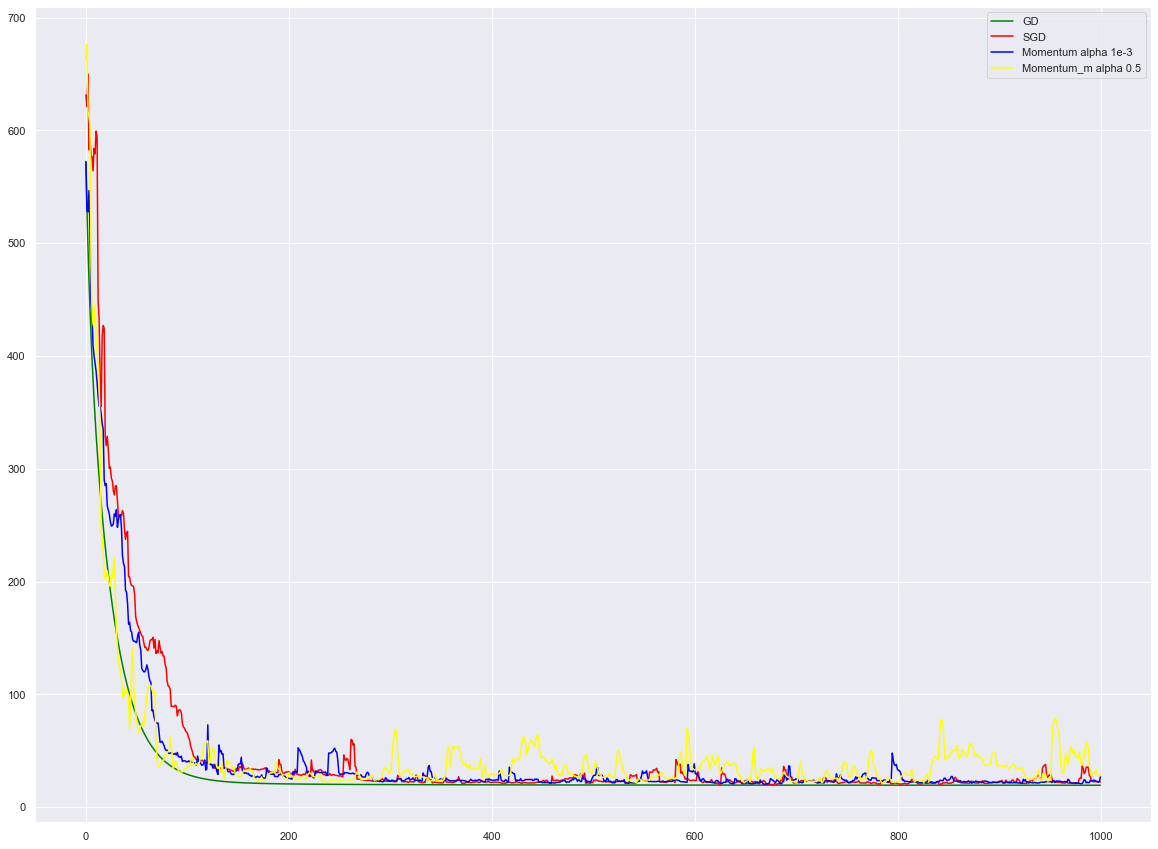

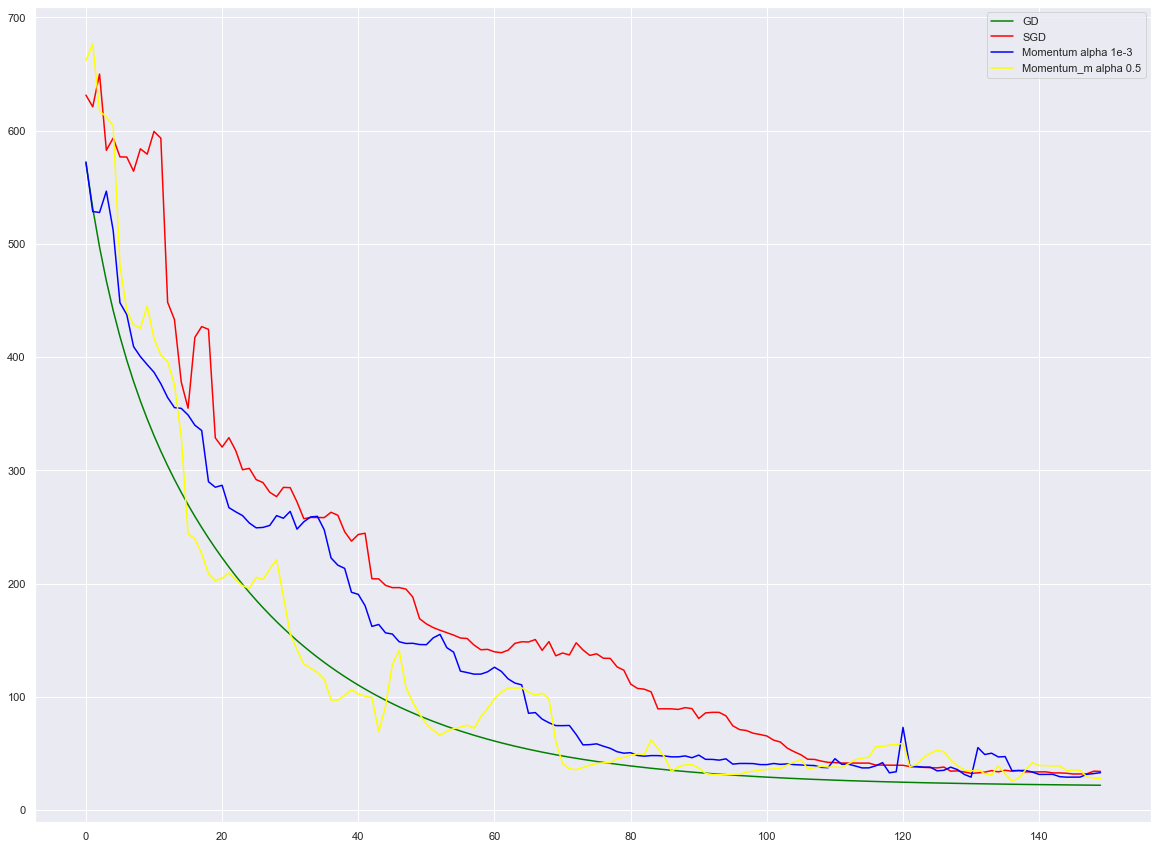

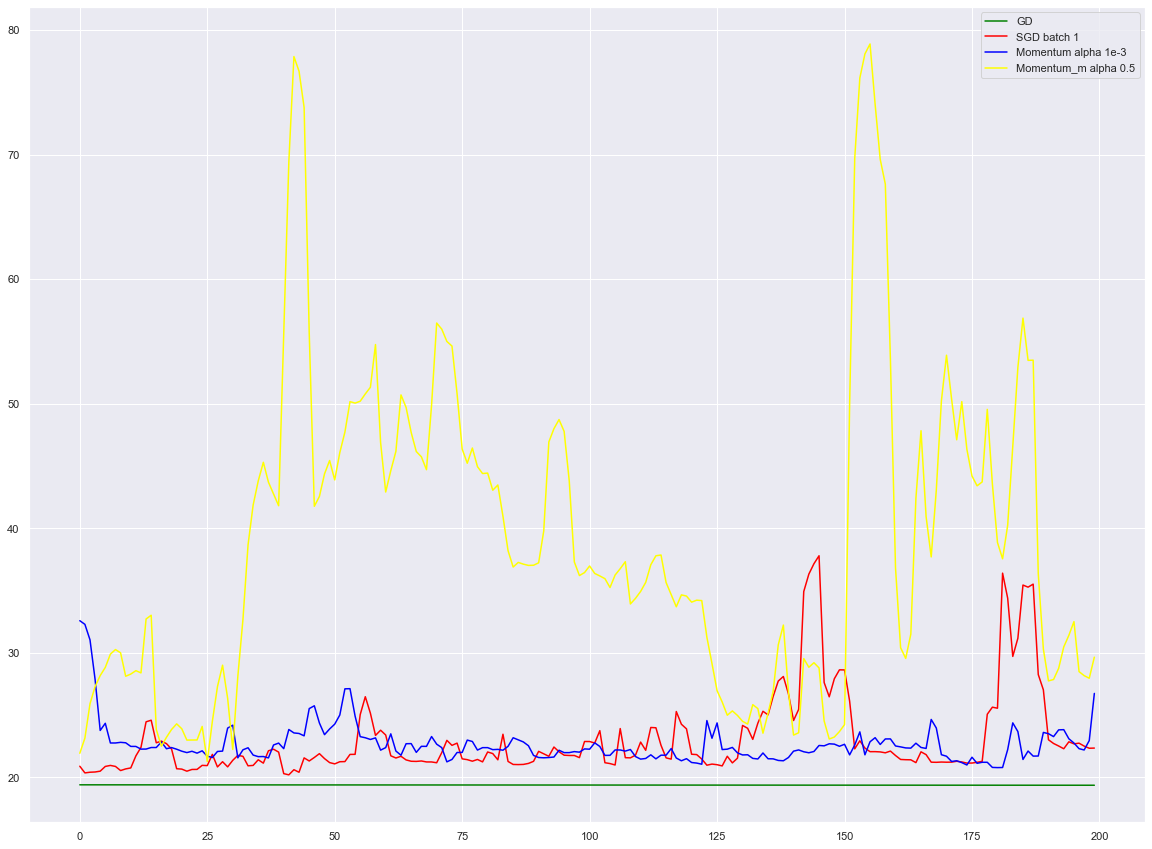

In [12]:
PlotDraw()

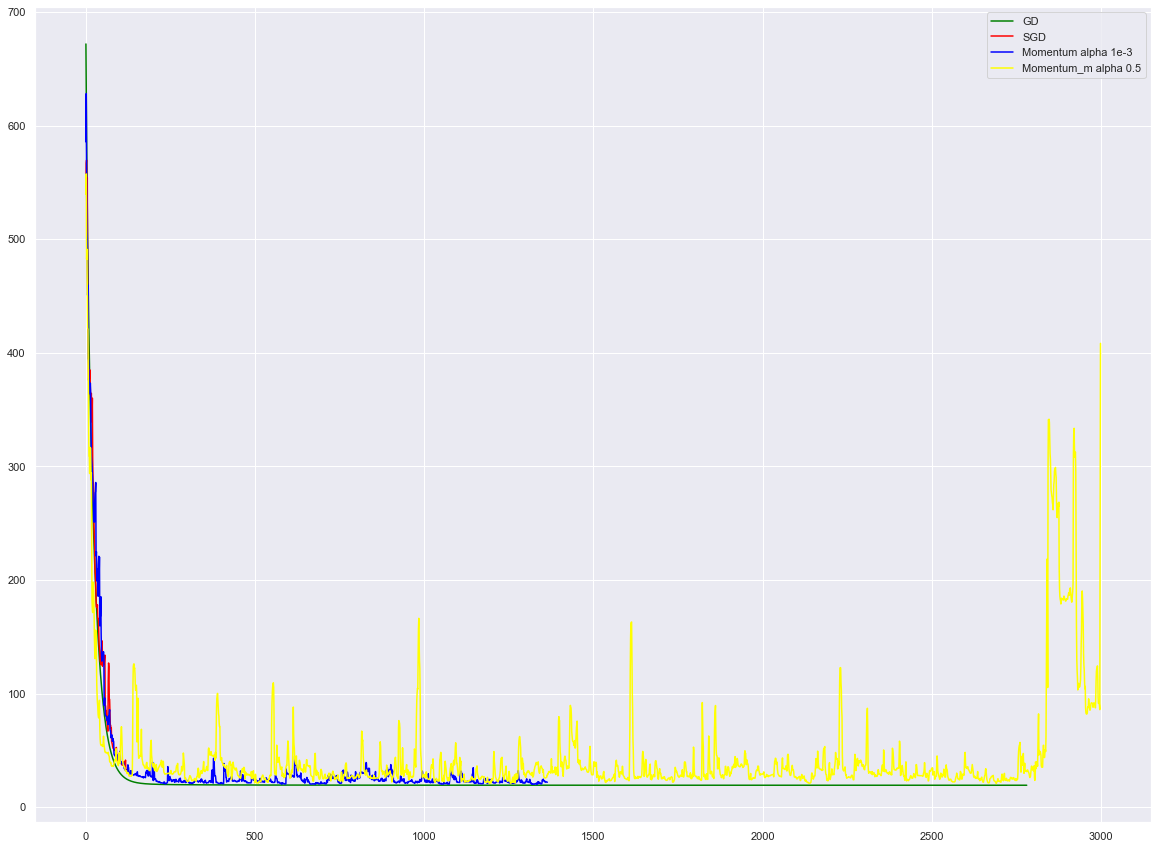

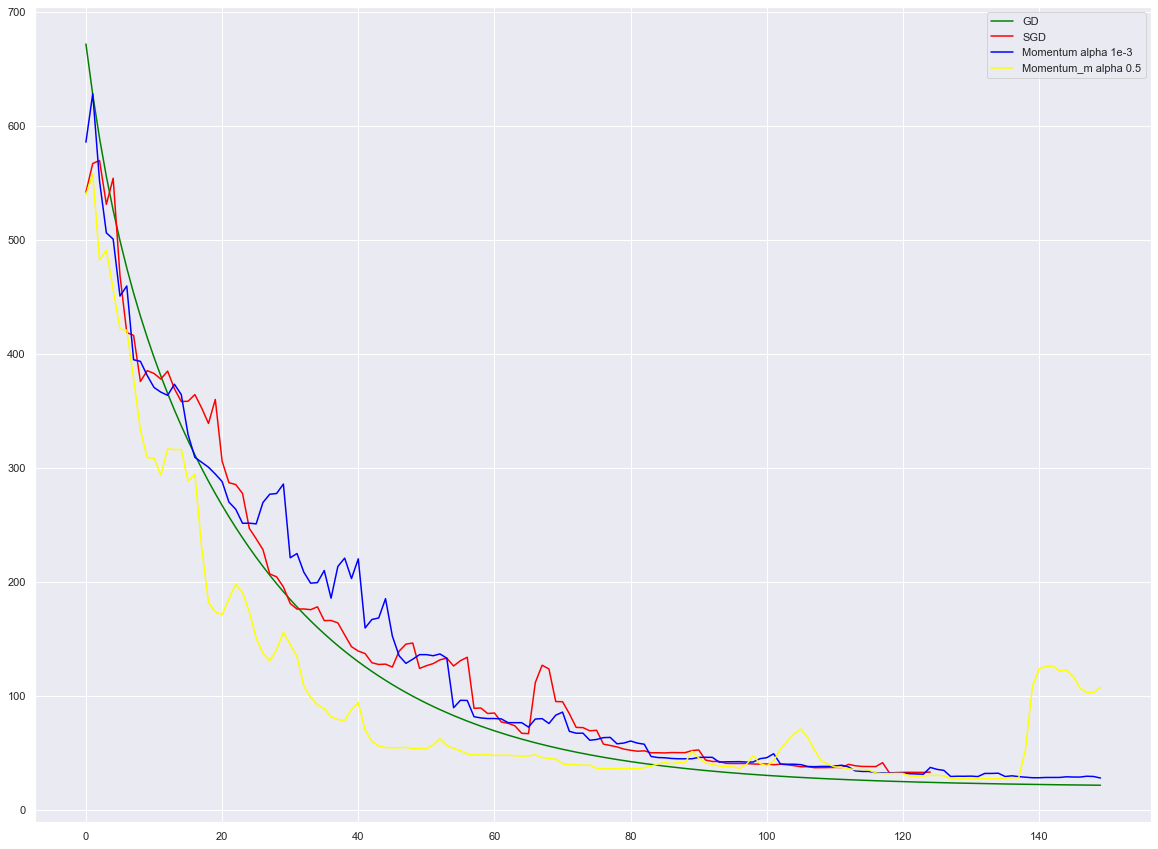

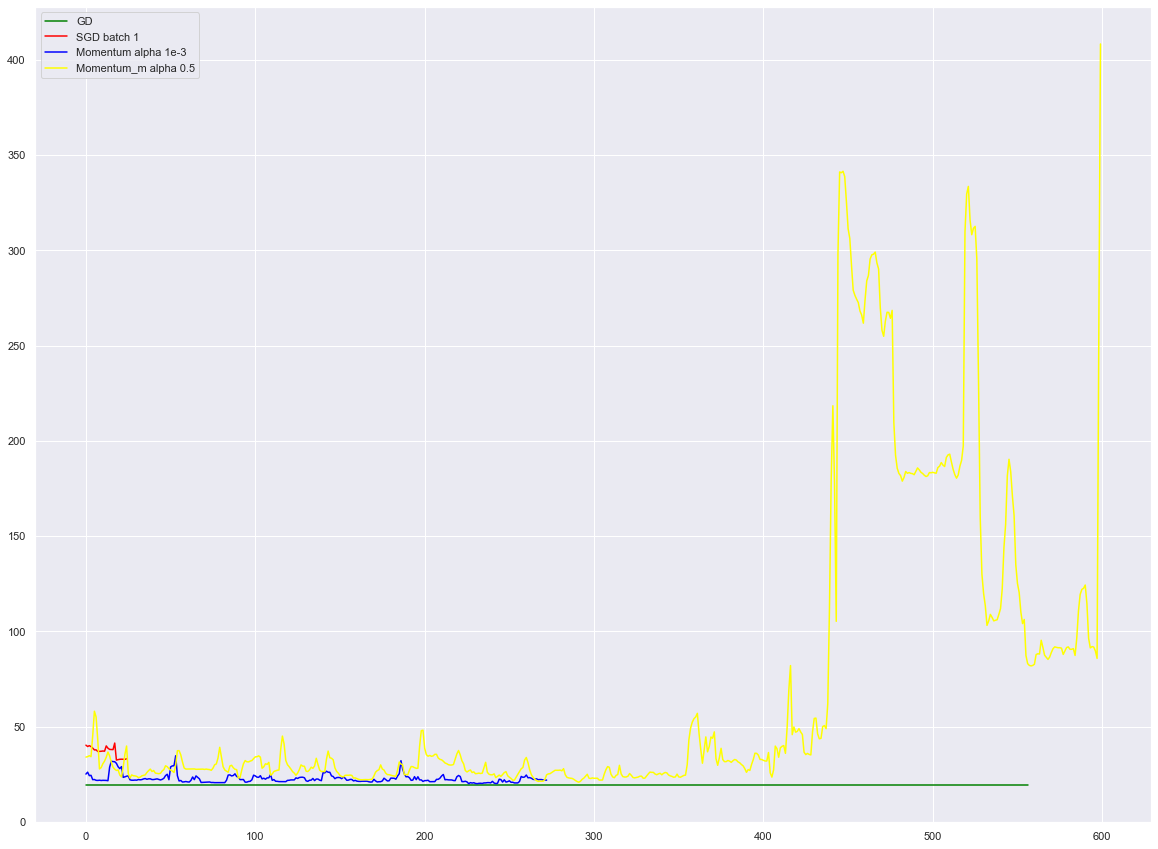

In [13]:
PlotDraw(3000)

## Comments
As you can see from our graph, the fastest convergence is GD. Then comes Momentum with a small alpha, which is close enough to GD. At the end come SGD and Momentum with a large alpha. It is worth noting that Momentum with a large alpha does not converge well in general, it apparently lacks iterations. These results are quite logical and clearly show the importance of alpha for the Momentum method and GD's gain in final quality.